Import Import the libraries needed for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load train datasets and test datasets. Quick view the datasets to see feature and value of datasets

In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

print('\n---------------------Train Dataset---------------------\n')
print(df_train.head())

print('\n---------------------Test Dataset---------------------\n')
print(df_test.head())


---------------------Train Dataset---------------------

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781  

Displays a list of categories/features from a dataframe

In [3]:
#dataframe shapes
print('Shape of train dataframe:', df_train.shape)
print('Shape of test dataframe:', df_test.shape)

#train data info: count, feature names, data types, missing data counts
print('\n---------------------Train Dataset Info---------------------')
print(df_train.info())

#Get statistical summaries for each feature
print('\n---------------------Train Dataset Describe---------------------')
print(df_train.describe())

Shape of train dataframe: (1296675, 23)
Shape of test dataframe: (555719, 23)

---------------------Train Dataset Info---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null 

Observe 'is_fraud' using unique value method. 0 represent normal transaction, while 1 represents fraud transaction

In [4]:
print('\n Unique values:\n', df_train.is_fraud.unique())
print('\n Count unique values:\n', df_train.is_fraud.value_counts())
print('\n Percentage of unique values:\n', df_train.is_fraud.value_counts (normalize=True))
df_fraud_stat = pd.DataFrame({'Class': df_train.is_fraud.unique(),
                             'Count': df_train.is_fraud.value_counts(),
                             'Percentage': df_train.is_fraud.value_counts(normalize=True)})
print('\n Dataframe for fraud labels:\n', df_fraud_stat)


 Unique values:
 [0 1]

 Count unique values:
 is_fraud
0    1289169
1       7506
Name: count, dtype: int64

 Percentage of unique values:
 is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

 Dataframe for fraud labels:
           Class    Count  Percentage
is_fraud                            
0             0  1289169    0.994211
1             1     7506    0.005789


To make more readable features name, rename all coloumn and combine test and train datasets

In [5]:
df_combined = pd.concat([df_train, df_test], axis=0)
print('\n Shape of combined dataframe:\n', df_combined.shape)

old_feature_name = list(df_train.columns)
print('\n List of old features names:\n', old_feature_name)

new_feature_name = ['index', 'transaction_time', 'account_number', 'merchant_name', 'category',
       'transaction_amount', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'zip',
       'client_latitude', 'client_longitude', 'city_population', 'job', 'birthday', 'transaction_number', 'unix_time',
       'merchant_latitude', 'merchant_longitude', 'is_fraud']

feature_name_dict = {old_feature_name[i]: new_feature_name[i] for i in range(len(old_feature_name))}
print('\n Dictionary of old-new feature names:\n', feature_name_dict)

df_combined = df_combined.rename(columns=feature_name_dict)
print('\n Combine dataframe with new feature names:\n', df_combined.head(2))


 Shape of combined dataframe:
 (1852394, 23)

 List of old features names:
 ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

 Dictionary of old-new feature names:
 {'Unnamed: 0': 'index', 'trans_date_trans_time': 'transaction_time', 'cc_num': 'account_number', 'merchant': 'merchant_name', 'category': 'category', 'amt': 'transaction_amount', 'first': 'first_name', 'last': 'last_name', 'gender': 'gender', 'street': 'street', 'city': 'city', 'state': 'state', 'zip': 'zip', 'lat': 'client_latitude', 'long': 'client_longitude', 'city_pop': 'city_population', 'job': 'job', 'dob': 'birthday', 'trans_num': 'transaction_number', 'unix_time': 'unix_time', 'merch_lat': 'merchant_latitude', 'merch_long': 'merchant_longitude', 'is_fraud': 'is_fraud'}

 Combine dataframe with new feature names:
    ind

Convert transaction time from str to datetime type, calculate age, transaction distance, create interfal age, and rename gender feature.

In [6]:
# Convert transaction_time from string to datetime type. Add transaction date, hour, month to combined dataframe
df_combined.transaction_time = pd.to_datetime(df_combined.transaction_time)
df_combined['transaction_date'] = df_combined.transaction_time.dt.strftime('%Y-%m-%d')
df_combined['transaction_hour'] = df_combined.transaction_time.dt.strftime('%H')
df_combined['transaction_month'] = df_combined.transaction_time.dt.strftime('%m')

# Convert transaction_birthday from string to datetime type. Add 'birthday_date' and 'age' features to combined dataframe
df_combined.birthday = pd.to_datetime(df_combined.birthday)
df_combined['birthday_date'] = df_combined.birthday.dt.strftime('%Y-%m-%d')

# Calculate age
df_combined['age'] = (df_combined['transaction_time'] - df_combined['birthday']).dt.days / 365.25

# calculate transaction distance 
distance_trans_longitude = df_combined.merchant_longitude - df_combined.client_longitude
distance_trans_lattitude = df_combined.merchant_latitude - df_combined.client_latitude
distance_trans = np.sqrt(distance_trans_longitude**2 + distance_trans_lattitude**2)

# Add distance features to combined dataframe
df_combined['transaction_longitude_distance'] = distance_trans_longitude
df_combined['transaction_lattitude_distance'] = distance_trans_lattitude
df_combined['transaction_distance'] = distance_trans

# Create age_interval function
def age_interval(x):
    """
    Binning age values to categorical ones with 5 categories:
    'Less than 20', 'Between 20 and 30', 'Between 30 and 40', 
    'Between 40 and 50', 'Between 50 and 60' and 'Larger than 60'
    """
    if x < 20:
        return "Less than 20" 
    elif x >=20 and x < 30:
        return "Between 20 and 30"
    elif x >=30 and x < 40:
        return "Between 30 and 40"
    elif x >=40 and x < 50:
        return "Between 40 and 50"
    elif x >=50 and x < 60:
        return "Between 50 and 60"
    else: 
        return "Larger than 60"

# Create rename function for gender feature
def gender_rename(x):
    """
        Rename gender value: 'M' to 'Male' 
        and 'F' to 'Female'
    """
    if x == 'M':
        return "Male" 
    else: 
        return "Female"
    
# Create 'age_intervals' 
df_combined['age_intervals'] = df_combined.age.map(lambda x : age_interval(x))

# Rename gender values
df_combined['gender'] = df_combined.gender.map(lambda x : gender_rename(x))


After prepared and changed the features of the data, the next step is slice the dataframe to obtain the df_train_preprocessed and df_test_preprocessed dataframes.

In [7]:
train_samples_len = df_train.shape[0]
df_train_preprocessed = df_combined.iloc[:train_samples_len, :]
df_test_preprocessed = df_combined.iloc[train_samples_len:,:]

# Save the preprocessed dataframes into new corresponding csv files for further analyze later
df_train_preprocessed.to_csv('./df_train_preprocessed.csv')
df_test_preprocessed.to_csv('./df_test_preprocessed.csv')

Make visualization using dataframe 'df_train_preprocessed'

In [8]:
df = pd.read_csv('df_train_preprocessed.csv')

# Get preprocessed train dataframe dedicated to fraud observations
df_fraud = df[df.is_fraud==1]

print('Shape for preprocessed train dataset: \n', df.shape)
print('Shape for only-fraud train dataset: \n', df_fraud.shape)

Shape for preprocessed train dataset: 
 (1296675, 33)
Shape for only-fraud train dataset: 
 (7506, 33)


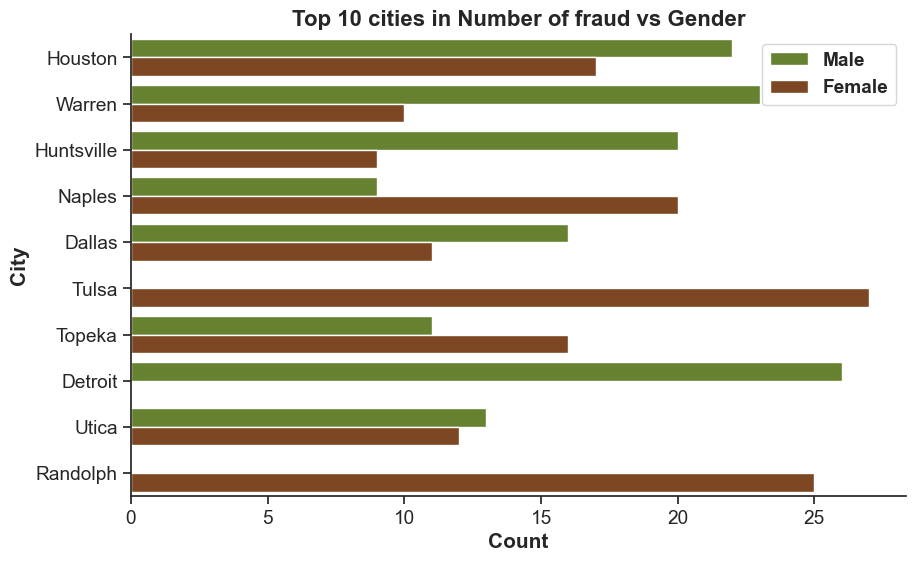

In [9]:
fig = plt.figure(figsize=(10,6))

colors = ["#6B8E23", "#8B4513"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with region on the y-axis
g = sns.countplot(y = 'city',
                  data=df_fraud, 
                  hue='gender',
                  width=0.8,
                  order=df_fraud.city.value_counts(sort=True, ascending=False).head(10).index)

# Set title, label, legend 
g.set_title('Top 10 cities in Number of fraud vs Gender', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('City', fontsize=15, fontweight='bold')
g.legend(prop={'weight':'bold'})

# Show plot
plt.show()

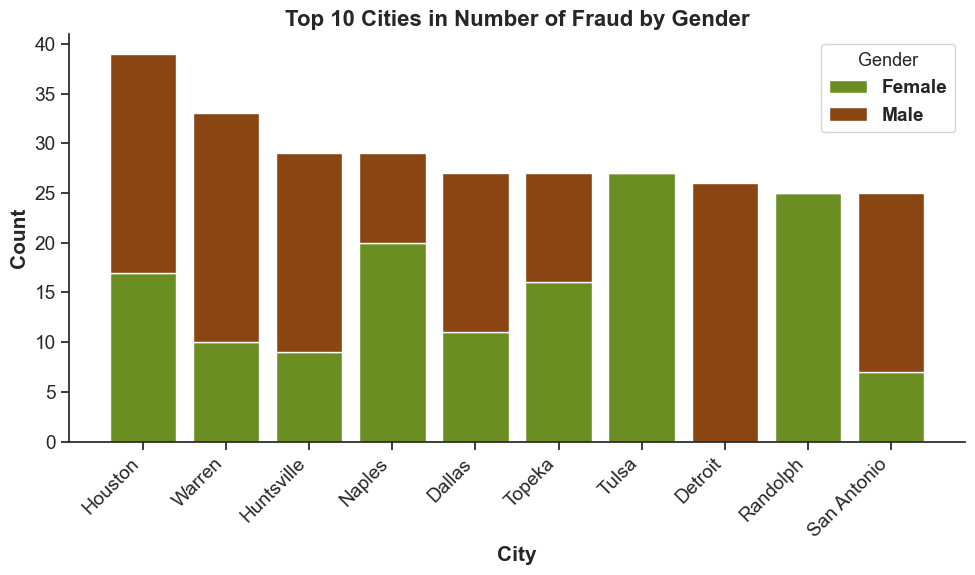

In [10]:

# Agregasi data: hitung jumlah kasus fraud per kota dan gender
agg_data = df_fraud.groupby(['city', 'gender']).size().unstack(fill_value=0)

# Pilih 10 kota dengan jumlah kasus terbanyak
top_10_cities = agg_data.sum(axis=1).nlargest(10).index
agg_data = agg_data.loc[top_10_cities]


# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data
bar_width = 0.8
bottoms = [0] * len(agg_data.index)
colors = ["#6B8E23", "#8B4513"]

# Plot each gender's data
for i, gender in enumerate(agg_data.columns):
    ax.bar(
        agg_data.index,
        agg_data[gender],
        bar_width,
        color=colors[i],
        bottom=bottoms,
        label=gender
    )
    # Update bottoms for the next gender stack
    bottoms = [b + h for b, h in zip(bottoms, agg_data[gender])]

# Set title, labels, and legend
ax.set_title('Top 10 Cities in Number of Fraud by Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('City', fontsize=15, fontweight='bold')
ax.set_ylabel('Count', fontsize=15, fontweight='bold')
ax.legend(title='Gender', title_fontsize='13', fontsize='12', prop={'weight': 'bold'})

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')


# Show plot
plt.tight_layout()
plt.show()


   gender   count  Number of fraud  Fraud ratio
0  Female  709863             3735         0.53
1    Male  586812             3771         0.64


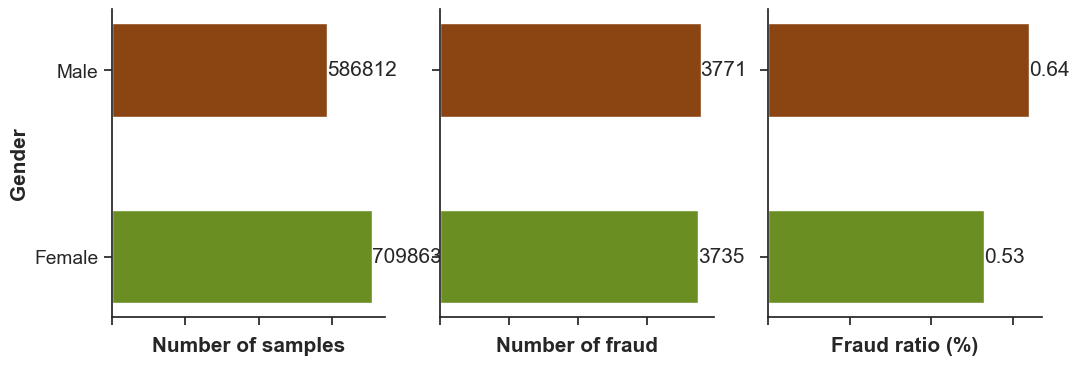

In [11]:
df_gender_is_fraud = df[['gender', 'is_fraud']]
df_gender_is_fraud = df_gender_is_fraud.groupby(['gender']).agg(['count', 'sum', 'mean',])
df_gender_is_fraud.columns = ['count', 'Number of fraud', 'Fraud ratio']
df_gender_is_fraud.reset_index(inplace=True)
df_gender_is_fraud["Fraud ratio"] = df_gender_is_fraud["Fraud ratio"].apply(lambda x: round(x*100, 2))
print(df_gender_is_fraud)

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,4))
colors = ["#6B8E23", "#8B4513"]
ax1.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['count'], 
         color=colors,
         height=0.5,)
ax1.set_ylabel("Gender", weight='bold', fontsize=15)
ax1.set_xlabel('Number of samples', weight='bold', fontsize=15)
ax1.bar_label(ax1.containers[0], label_type='edge')
ax1.set_xticklabels([])

ax2.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['Number of fraud'], 
         color=colors,
         height=0.5)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xlabel('Number of fraud', weight='bold', fontsize=15)
ax2.bar_label(ax2.containers[0], label_type='edge')

ax3.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['Fraud ratio'], 
         color=colors,
         height=0.5)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xlabel('Fraud ratio (%)', weight='bold', fontsize=15)
ax3.bar_label(ax3.containers[0], label_type='edge')
plt.show()


<Figure size 640x480 with 0 Axes>